In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from parametres import Paras
from utilities import *
from initialisation import *
from odes import odes_scale_size
import matplotlib.pyplot as plt
from size_scaled_func import *
import datetime as dt
from simulation_func import *
import pandas as pd

# Running the Simulations


- Setting 25 species, 50 resources
- 100 simulations were performed

In [2]:
# Setting parametres
N = 25
M = 50
#assemblenum = 1
para = Paras(N, M)

In [3]:
# Store data
Rt_assemblies = []
Ct_assemblies = []
assemlies = 100
para_assemblies = []
time_assemblies = []

In [4]:
# Run simulation
start = dt.datetime.now()
for i in range(assemlies):
    Rt, Ct, t, para = sim_run(N, M, para, i, tstop=10000, teval=10000)
    Rt_assemblies.append(Rt)
    Ct_assemblies.append(Ct)
    para_assemblies.append(para)
    time_assemblies.append(t)
    print(f'Asembly {i+1} complete, runtime:{dt.datetime.now()-start}') if (i+1) %5==0 else None

Asembly 5 complete, runtime:0:00:00.171730
Asembly 10 complete, runtime:0:00:00.346395
Asembly 15 complete, runtime:0:00:00.517561
Asembly 20 complete, runtime:0:00:00.686732
Asembly 25 complete, runtime:0:00:02.160029
Asembly 30 complete, runtime:0:00:02.355673
Asembly 35 complete, runtime:0:00:02.544862
Asembly 40 complete, runtime:0:00:02.734045
Asembly 45 complete, runtime:0:00:02.918663
Asembly 50 complete, runtime:0:00:03.120855
Asembly 55 complete, runtime:0:00:03.329281
Asembly 60 complete, runtime:0:00:03.532481
Asembly 65 complete, runtime:0:00:03.711942
Asembly 70 complete, runtime:0:00:03.886111
Asembly 75 complete, runtime:0:00:04.069785
Asembly 80 complete, runtime:0:00:04.251964
Asembly 85 complete, runtime:0:00:04.520726
Asembly 90 complete, runtime:0:00:07.158463
Asembly 95 complete, runtime:0:00:07.367930
Asembly 100 complete, runtime:0:00:07.576134


## Analysis

### Plot final abundance for each assembly and species
- Choose 5 communities


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
C5 = Ct_assemblies[0:25]
abundance25 = np.empty((N, 25))
for i, assembly in enumerate(C5):
    abundance25[:, i] = assembly[:, -1]
abundance25 = abundance25/np.sum(abundance25, axis=0)

Text(0.5, 181.33333333333331, 'Simulations')

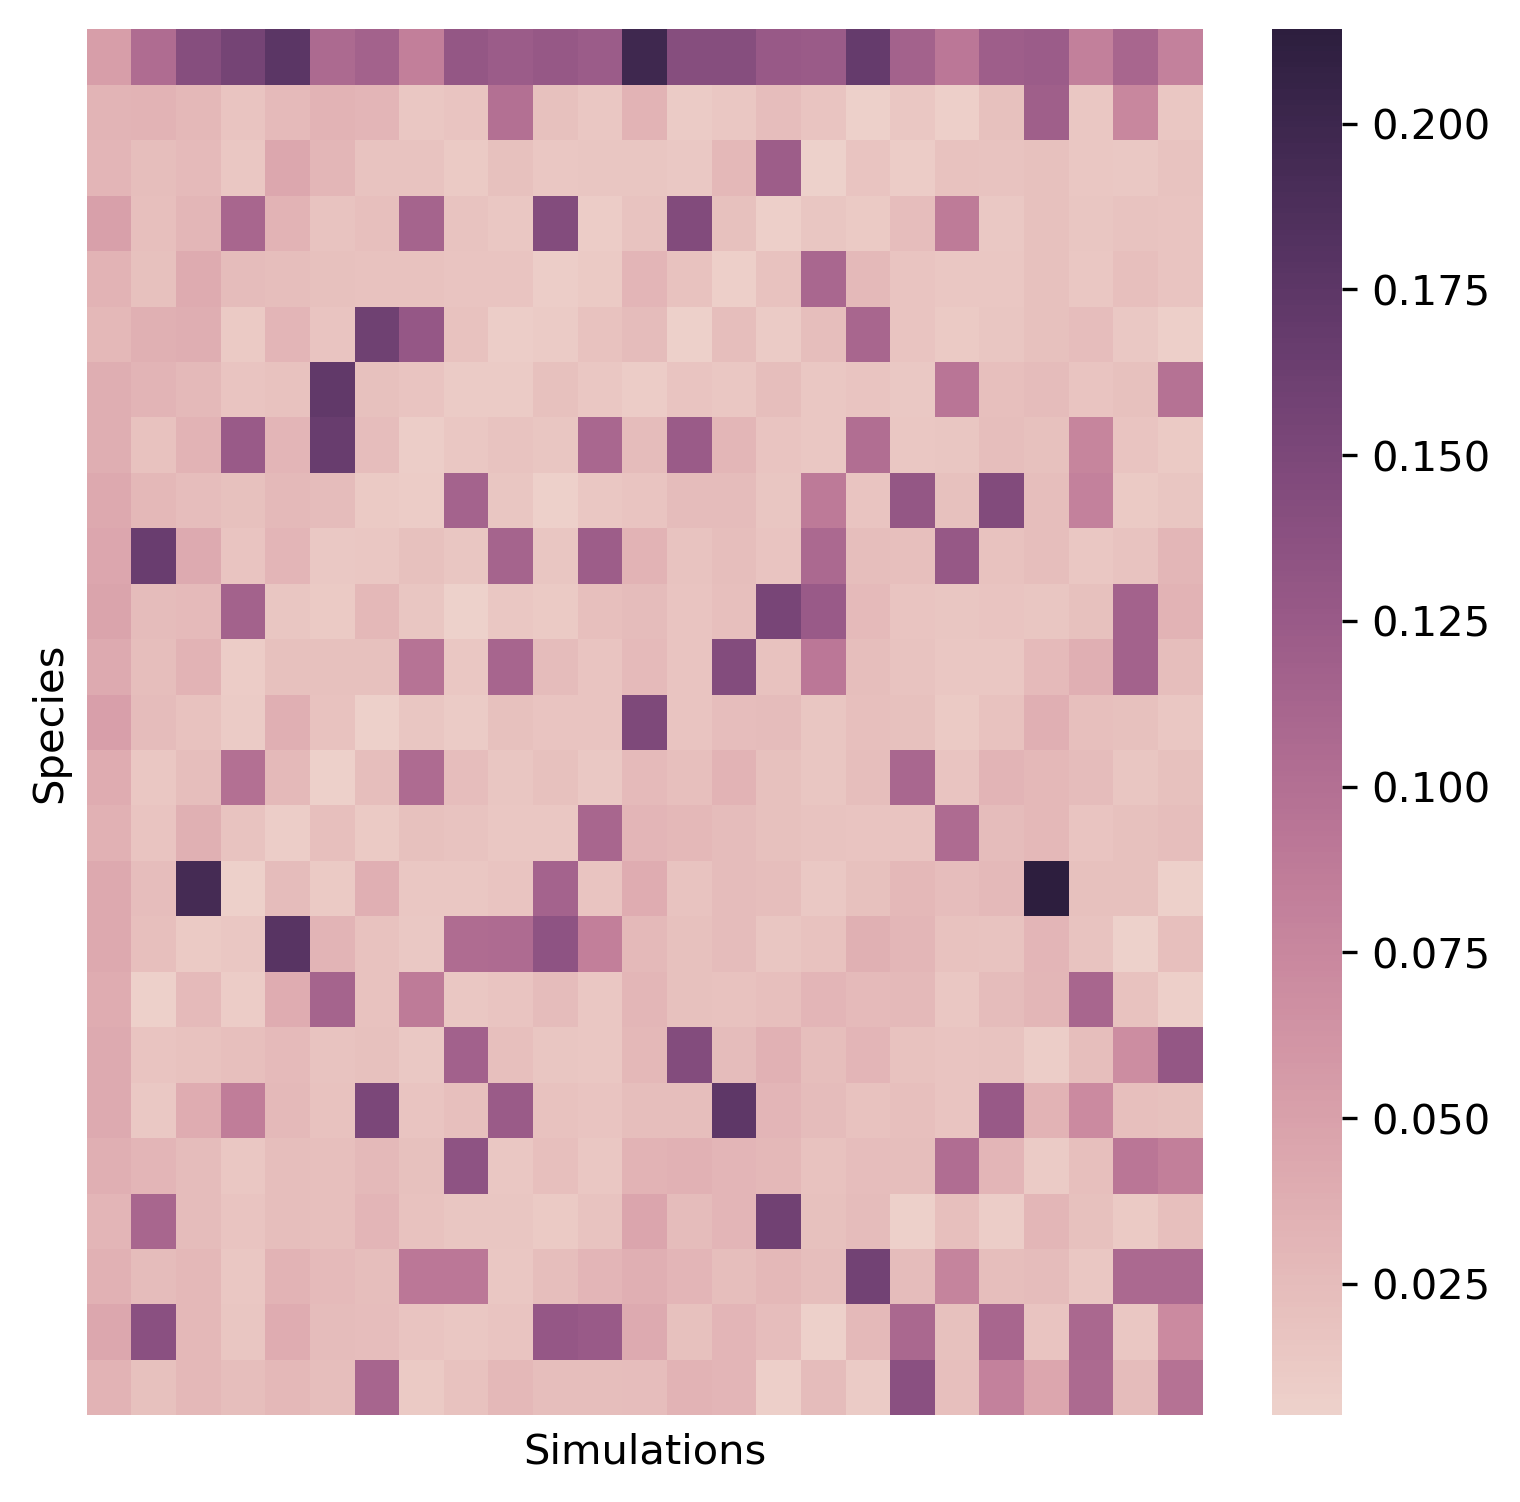

In [7]:
plt.figure(figsize=(6, 6), dpi=300)
sns.heatmap(abundance25, cmap=sns.cubehelix_palette(as_cmap=True)
, xticklabels=False, yticklabels=False)
plt.ylabel('Species')
plt.xlabel('Simulations')

### Ploting relative abundance v.s. size


In [8]:
# Cts = extract_Ct_single_assembly(Ct_assemblies[5])
# rAs = relative_abundance(Cts)
# sns.scatterplot(x=np.log10(Cts[:, 4]), y=rAs[:, 4])
# sns.scatterplot(x=np.log10(Cts[:, 5]), y=rAs[:, 5])

### Plotting biomass distirbution at initial time and final time

In [9]:
# Extract the initial and final data

initial = np.empty((N*assemlies))
final = np.empty((N*assemlies))
for i in range(len(para_assemblies)):
    model = para_assemblies[i]
    initial[i*N:(i+1)*N] = model.C.reshape(N)
    mass = Ct_assemblies[i]
    final[i*N:(i+1)*N] = mass[:, -1]

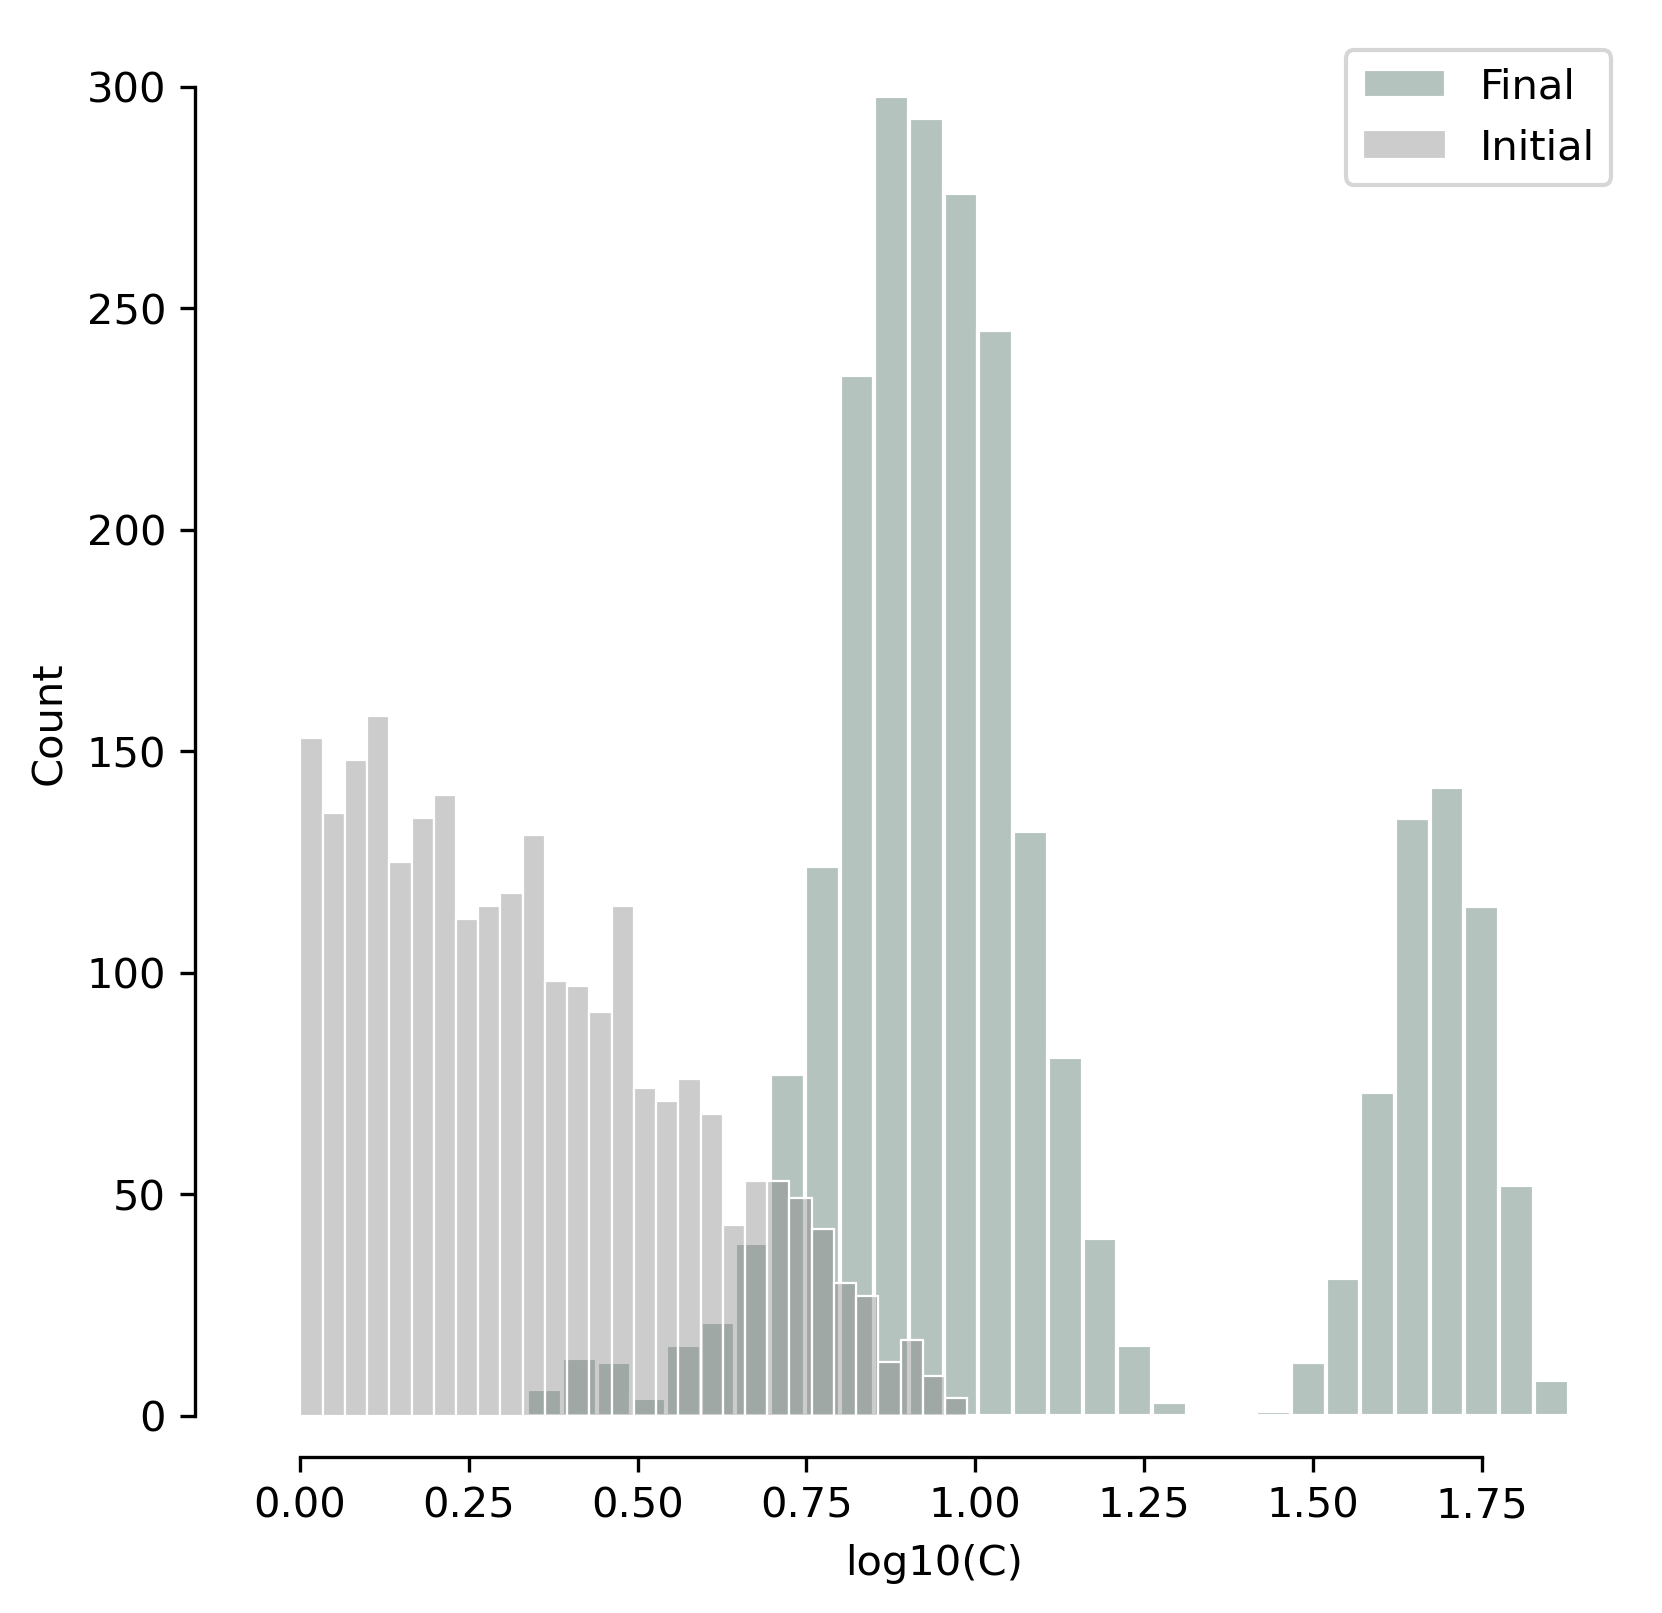

In [10]:
# Plot 
plt.figure(figsize=(6, 6), dpi=300)
sns.histplot(
    np.log10(final), label='Final', color='#456B5C', 
    bins=30, alpha=0.4,
    edgecolor='white')
sns.histplot(np.log10(initial), label='Initial', color='grey', 
             bins=30, alpha=0.4,
             edgecolor='white')
plt.legend()
plt.xlabel('log10(C)')
sns.despine(offset=10, trim=True)

In [11]:
species1vg = []
m1 = []
for i in range(len(t)):
    resourcet = Rt[:, i].reshape(M, 1)
    masst = Ct[:, i].reshape(N, 1)
    v_in = vin(para.p, resourcet, para.R_half, vmax=para.v_in_max, type=2)
    v_in = scale_vin(v_in, masst, para.B0, para.alpha)
    v_g = vgrow(v_in, para.l)
    # v_g = scale_vgrow(v_g, masst, para.B0, para.alpha)
    v_g = v_g * masst
    species1vg.append(v_g[0])
    m_scale = scale_mt(para.m, masst, para.M0, para.alpha)
    m_scale = m_scale * masst
    m1.append(m_scale[0])


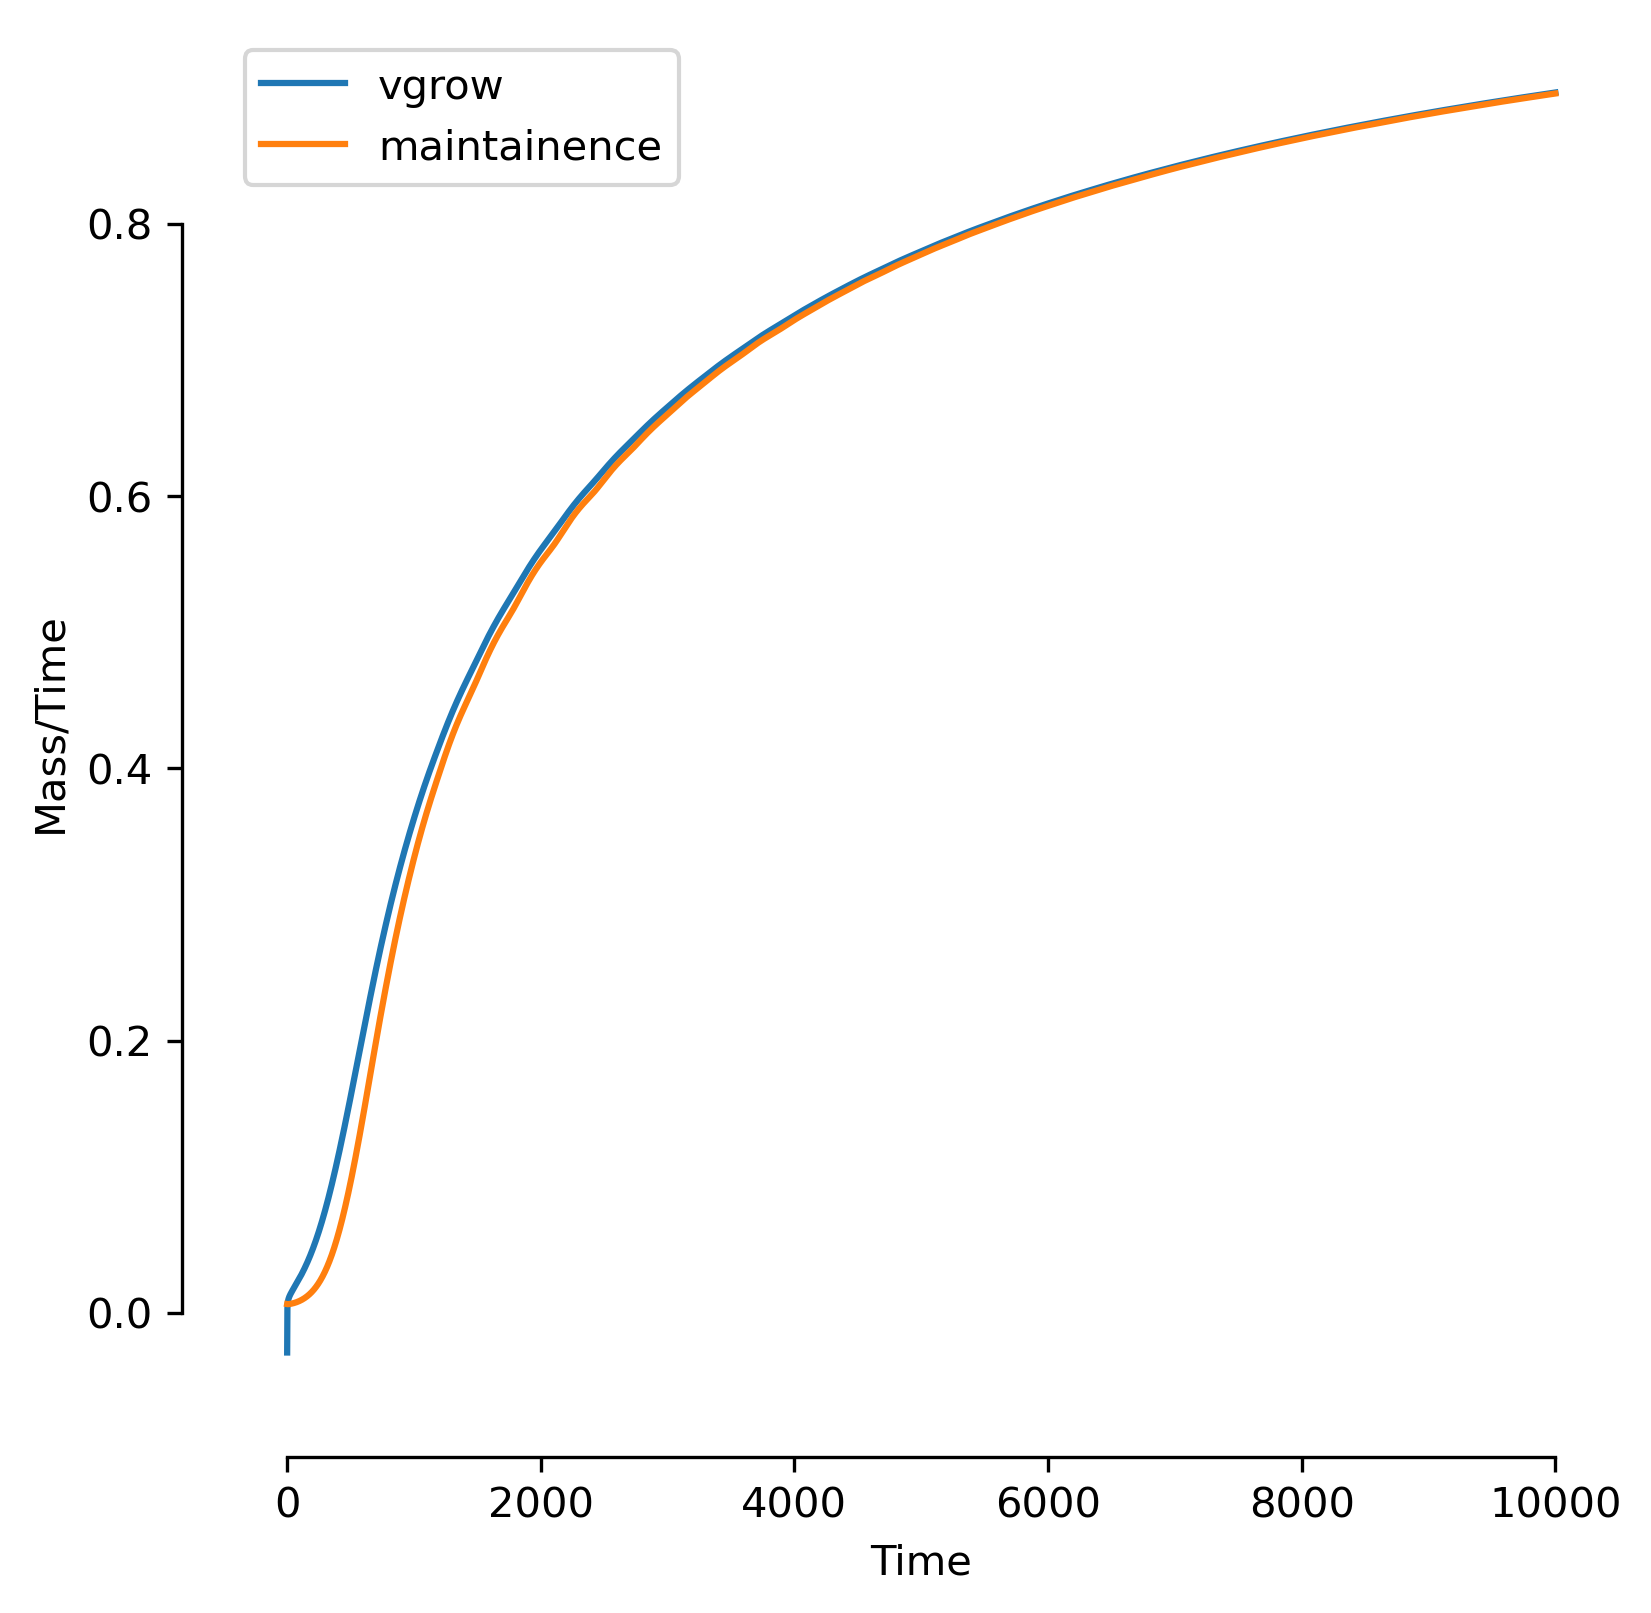

In [12]:
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(t, species1vg, label = 'vgrow')
plt.plot(t, m1, label='maintainence')
plt.legend()
plt.ylabel('Mass/Time')
plt.xlabel('Time')
sns.despine(offset=10, trim=True)

### Relative abundance distribution at Final Time

In [13]:
spec_name = np.array([f'species {i}' for i in range(1, N+1)])
# df = pd.DataFrame({
#     'C':0,
#     'Species': 'Species 1'
# })
l = []
for i, item in enumerate(Ct_assemblies):
    temp = pd.DataFrame({'C':item[:, -1], 'Species': spec_name})
    l.append(temp)
result = pd.concat(l)

<Figure size 1800x1800 with 0 Axes>

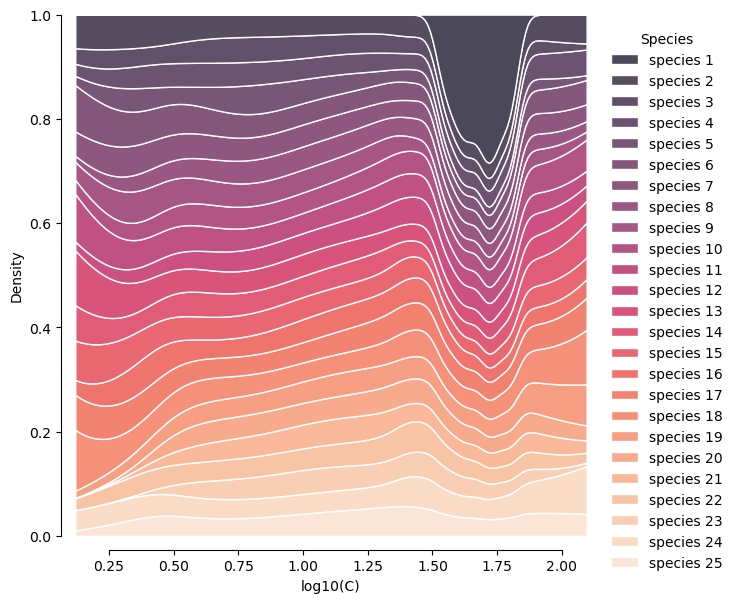

In [14]:
# biomass
plt.figure(figsize=(6, 6), dpi=300)
sns.displot(
    data=result,
    x=np.log10(result['C']), hue="Species",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette=sns.color_palette("rocket", N),
    edgecolor='white'
)
plt.xlabel('log10(C)')
sns.despine(offset=10, trim=True)

<Figure size 1800x1800 with 0 Axes>

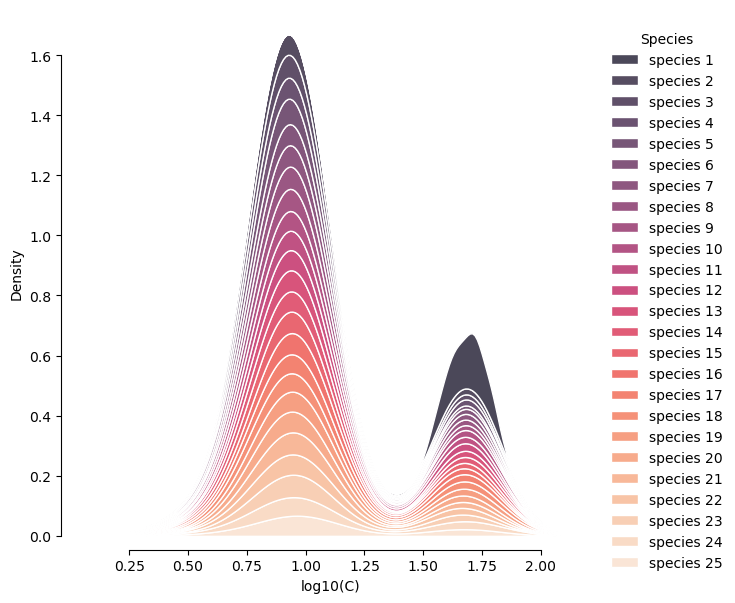

In [15]:
# biomass
plt.figure(figsize=(6, 6), dpi=300)
sns.displot(
    data=result,
    x=np.log10(result['C']), hue="Species",
    kind="kde", height=6,
    multiple="stack", clip=(0, None),
    palette=sns.color_palette("rocket", N),
    edgecolor='white'
)
plt.xlabel('log10(C)')
sns.despine(offset=10, trim=True)

In [16]:
spec_name = np.array([f'species {i}' for i in range(1, N+1)])
# df = pd.DataFrame({
#     'C':0,
#     'Species': 'Species 1'
# })
l2 = []
for i, item in enumerate(Ct_assemblies):
    temp = pd.DataFrame({'ad':item[:, -1]/np.sum(item[:, -1]), 'Species': spec_name})
    l2.append(temp)
result2 = pd.concat(l2)

<Figure size 1800x1800 with 0 Axes>

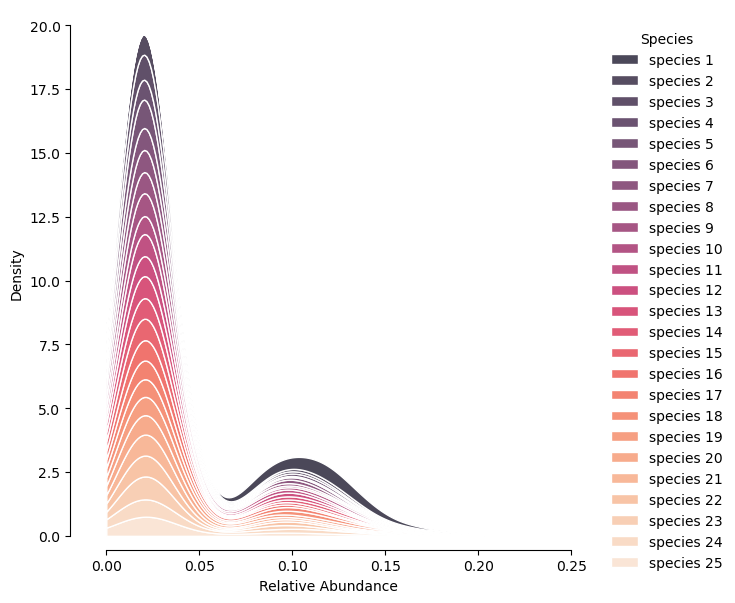

In [17]:
# biomass
plt.figure(figsize=(6, 6), dpi=300)
sns.displot(
    data=result2,
    x='ad', hue="Species",
    kind="kde", height=6,
    multiple="stack", clip=(0, None),
    palette=sns.color_palette("rocket", N),
    edgecolor='white'
)
plt.xlabel('Relative Abundance')
sns.despine(offset=10, trim=True)

<Figure size 1800x1800 with 0 Axes>

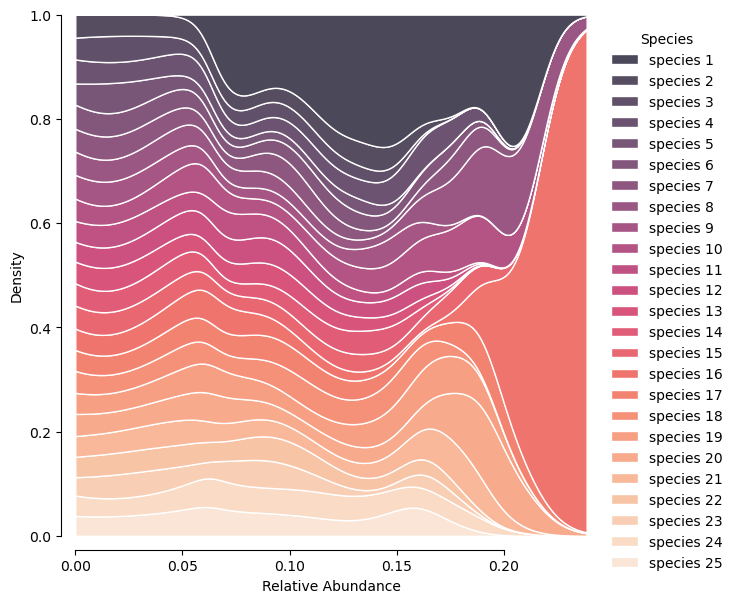

In [18]:
# biomass
plt.figure(figsize=(6, 6), dpi=300)
sns.displot(
    data=result2,
    x='ad', hue="Species",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette=sns.color_palette("rocket", N),
    edgecolor='white'
)
plt.xlabel('Relative Abundance')
sns.despine(offset=10, trim=True)